## Linear Regression  to predict Olympic Medal count for top 25 countries
---

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

### Top 25 countries that won most medals
---

In [2]:
top_df = pd.read_csv('top_25.csv')
print(top_df.shape)
top_df.head()

(25, 9)


,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals
0,USA,4,10362,565,4341,1035,802,707,2544
1,Russia,1,6323,404,3191,592,498,487,1577
2,Germany,2,8471,510,3766,442,457,490,1389
3,UK,3,7634,525,3665,278,316,298,892
4,France,2,7023,540,3479,233,255,282,770


In [3]:
# Assigning Id to each Country
top_df['CountryId'] = [(x+1) for x in range(25)]

print(top_df.shape)
top_df.head()

(25, 10)


,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals,CountryId
0,USA,4,10362,565,4341,1035,802,707,2544,1
1,Russia,1,6323,404,3191,592,498,487,1577,2
2,Germany,2,8471,510,3766,442,457,490,1389,3
3,UK,3,7634,525,3665,278,316,298,892,4
4,France,2,7023,540,3479,233,255,282,770,5


In [4]:
top_df = top_df[['Country', 'CountryId']]
print(top_df.shape)
top_df.head()

(25, 2)


,Country,CountryId
0,USA,1
1,Russia,2
2,Germany,3
3,UK,4
4,France,5


### Summer Olympic data with athlete, sports, events and medals count
---

In [5]:
df = pd.read_csv('summer_athlete_medals_count.csv')
print(df.shape)
df.head()

(2790, 10)


,Year,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals
0,1896,Greece,1,102,9,39,10,17,17,44
1,1896,USA,0,14,3,16,11,6,2,19
2,1896,Germany,0,19,6,27,7,5,2,14
3,1896,France,0,12,6,18,5,4,2,11
4,1896,UK,0,10,7,19,3,3,3,9


In [6]:
# Adding country_id column to summer df
df = pd.merge(df,top_df, how = 'left', on = 'Country')
print(df.shape)
df.head()

(2790, 11)


,Year,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals,CountryId
0,1896,Greece,1,102,9,39,10,17,17,44,25.0
1,1896,USA,0,14,3,16,11,6,2,19,1.0
2,1896,Germany,0,19,6,27,7,5,2,14,3.0
3,1896,France,0,12,6,18,5,4,2,11,5.0
4,1896,UK,0,10,7,19,3,3,3,9,4.0


In [7]:
# Dropping the countries that are not top 25
df = df.dropna()
print(df.shape)
df.head()

(634, 11)


,Year,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals,CountryId
0,1896,Greece,1,102,9,39,10,17,17,44,25.0
1,1896,USA,0,14,3,16,11,6,2,19,1.0
2,1896,Germany,0,19,6,27,7,5,2,14,3.0
3,1896,France,0,12,6,18,5,4,2,11,5.0
4,1896,UK,0,10,7,19,3,3,3,9,4.0


In [8]:
df['Athletes per event'] = round(df['Athletes']/df['Events'], 2)
print(df.shape)
df.head()

(634, 12)


,Year,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals,CountryId,Athletes per event
0,1896,Greece,1,102,9,39,10,17,17,44,25.0,2.62
1,1896,USA,0,14,3,16,11,6,2,19,1.0,0.88
2,1896,Germany,0,19,6,27,7,5,2,14,3.0,0.70
3,1896,France,0,12,6,18,5,4,2,11,5.0,0.67
4,1896,UK,0,10,7,19,3,3,3,9,4.0,0.53


In [9]:
# Bring 'CountryId' column to the front
col = df.pop('CountryId')
df.insert(0,'CountryId', col)

print(df.shape)
df.head()

(634, 12)


,CountryId,Year,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals,Athletes per event
0,25.0,1896,Greece,1,102,9,39,10,17,17,44,2.62
1,1.0,1896,USA,0,14,3,16,11,6,2,19,0.88
2,3.0,1896,Germany,0,19,6,27,7,5,2,14,0.70
3,5.0,1896,France,0,12,6,18,5,4,2,11,0.67
4,4.0,1896,UK,0,10,7,19,3,3,3,9,0.53


In [10]:
df = df.sort_values(['Year', 'Medals', 'Country'], ascending = [True, False, True])
print(df.shape)
df.head()

(634, 12)


,CountryId,Year,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals,Athletes per event
0,25.0,1896,Greece,1,102,9,39,10,17,17,44,2.62
1,1.0,1896,USA,0,14,3,16,11,6,2,19,0.88
2,3.0,1896,Germany,0,19,6,27,7,5,2,14,0.70
3,5.0,1896,France,0,12,6,18,5,4,2,11,0.67
4,4.0,1896,UK,0,10,7,19,3,3,3,9,0.53


In [11]:
df = pd.get_dummies(df, columns = ['Country'])
print(df.shape)
df.head()

(634, 36)


,CountryId,Year,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals,...,Country_Netherlands,Country_Norway,Country_Poland,Country_Romania,Country_Russia,Country_South Korea,Country_Sweden,Country_Switzerland,Country_UK,Country_USA
0,25.0,1896,1,102,9,39,10,17,17,44,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1896,0,14,3,16,11,6,2,19,...,0,0,0,0,0,0,0,0,0,1
2,3.0,1896,0,19,6,27,7,5,2,14,...,0,0,0,0,0,0,0,0,0,0
3,5.0,1896,0,12,6,18,5,4,2,11,...,0,0,0,0,0,0,0,0,0,0
4,4.0,1896,0,10,7,19,3,3,3,9,...,0,0,0,0,0,0,0,0,1,0


## Predicting medals for 2016
---

In [12]:
predict_year = 2016

#### Train data
---

In [13]:
train_df = df[df['Year'] < predict_year]
print(train_df.shape)
train_df.head()

(609, 36)


,CountryId,Year,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals,...,Country_Netherlands,Country_Norway,Country_Poland,Country_Romania,Country_Russia,Country_South Korea,Country_Sweden,Country_Switzerland,Country_UK,Country_USA
0,25.0,1896,1,102,9,39,10,17,17,44,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1896,0,14,3,16,11,6,2,19,...,0,0,0,0,0,0,0,0,0,1
2,3.0,1896,0,19,6,27,7,5,2,14,...,0,0,0,0,0,0,0,0,0,0
3,5.0,1896,0,12,6,18,5,4,2,11,...,0,0,0,0,0,0,0,0,0,0
4,4.0,1896,0,10,7,19,3,3,3,9,...,0,0,0,0,0,0,0,0,1,0


In [14]:
X = train_df.drop(['Gold', 'Silver', 'Bronze', 'Medals'], axis=1)

y1 = train_df['Gold'].values.reshape(-1, 1)
y2 = train_df['Silver'].values.reshape(-1, 1)
y3 = train_df['Bronze'].values.reshape(-1, 1)
y4 = train_df['Medals'].values.reshape(-1, 1)

print(X.shape, y1.shape, y2.shape, y3.shape, y4.shape)

(609, 32) (609, 1) (609, 1) (609, 1) (609, 1)


#### Test data
---

In [15]:
test_df = df[df['Year'] == predict_year].sort_values(['CountryId'])
print(test_df.shape)
test_df.head()

(25, 36)


,CountryId,Year,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals,...,Country_Netherlands,Country_Norway,Country_Poland,Country_Romania,Country_Russia,Country_South Korea,Country_Sweden,Country_Switzerland,Country_UK,Country_USA
2584,1.0,2016,0,555,33,245,46,37,38,121,...,0,0,0,0,0,0,0,0,0,1
2587,2.0,2016,0,284,29,181,19,17,20,56,...,0,0,0,0,1,0,0,0,0,0
2589,3.0,2016,0,418,29,217,17,10,15,42,...,0,0,0,0,0,0,0,0,0,0
2586,4.0,2016,0,360,26,198,27,23,17,67,...,0,0,0,0,0,0,0,0,1,0
2588,5.0,2016,0,392,32,202,10,18,14,42,...,0,0,0,0,0,0,0,0,0,0


In [16]:
test_data = test_df.drop(['Gold', 'Silver', 'Bronze', 'Medals'], axis = 1).reset_index(drop=True)
print(test_data.shape)
test_data.head()

(25, 32)


,CountryId,Year,Host,Athletes,Sports,Events,Athletes per event,Country_Australia,Country_Belgium,Country_Bulgaria,...,Country_Netherlands,Country_Norway,Country_Poland,Country_Romania,Country_Russia,Country_South Korea,Country_Sweden,Country_Switzerland,Country_UK,Country_USA
0,1.0,2016,0,555,33,245,2.27,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.0,2016,0,284,29,181,1.57,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3.0,2016,0,418,29,217,1.93,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,2016,0,360,26,198,1.82,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5.0,2016,0,392,32,202,1.94,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
top_df['Gold Actual'] = test_df['Gold'].reset_index(drop=True)
top_df['Silver Actual'] = test_df['Silver'].reset_index(drop=True)
top_df['Bronze Actual'] = test_df['Bronze'].reset_index(drop=True)
top_df['Total Medals Actual'] = test_df['Medals'].reset_index(drop=True)

print(top_df.shape)
top_df.head()

(25, 6)


,Country,CountryId,Gold Actual,Silver Actual,Bronze Actual,Total Medals Actual
0,USA,1,46,37,38,121
1,Russia,2,19,17,20,56
2,Germany,3,17,10,15,42
3,UK,4,27,23,17,67
4,France,5,10,18,14,42


### Test Train Split & Standard Scaler
---

In [18]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

# Gold
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, random_state=2)

# Silver
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, random_state=2)

# Bronze
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y3, random_state=2)

# Total Medals
X4_train, X4_test, y4_train, y4_test = train_test_split(X, y4, random_state=2)

In [19]:
print(X1_train.shape, y1_train.shape, X1_test.shape,  y1_test.shape)
print(X2_train.shape, y2_train.shape, X2_test.shape,  y2_test.shape)
print(X3_train.shape, y3_train.shape, X3_test.shape,  y3_test.shape)
print(X4_train.shape, y4_train.shape, X4_test.shape,  y4_test.shape)

(456, 32) (456, 1) (153, 32) (153, 1)
(456, 32) (456, 1) (153, 32) (153, 1)
(456, 32) (456, 1) (153, 32) (153, 1)
(456, 32) (456, 1) (153, 32) (153, 1)


## Linear Regression Model
---

In [20]:
from sklearn.linear_model import LinearRegression

### Gold
---

In [21]:
model1 = LinearRegression()

model1.fit(X1_train, y1_train)

training_score1 = model1.score(X1_train, y1_train)
testing_score1 = model1.score(X1_test, y1_test)

print('Gold Medals:')
print(f"Gold Training Score: {training_score1}")
print(f"Gold Testing Score: {testing_score1}")

Gold Medals:
Gold Training Score: 0.759094694383466
Gold Testing Score: 0.7900207894229179


### Silver
---

In [22]:
model2 = LinearRegression()

model2.fit(X2_train, y2_train)

training_score2 = model1.score(X2_train, y2_train)
testing_score2 = model1.score(X2_test, y2_test)

print('Silver Medals:')
print(f"Silver Training Score: {training_score2}")
print(f"Silver Testing Score: {testing_score2}")

Silver Medals:
Silver Training Score: 0.7159421719483701
Silver Testing Score: 0.735950512524856


### Bronze
---

In [23]:
model3 = LinearRegression()

model3.fit(X3_train, y3_train)

training_score3 = model3.score(X3_train, y3_train)
testing_score3 = model3.score(X3_test, y3_test)

print('Bronze Medals:')
print(f"Bronze Training Score: {training_score3}")
print(f"Bronze Testing Score: {testing_score3}")

Bronze Medals:
Bronze Training Score: 0.7962052220603539
Bronze Testing Score: 0.7205037649867392


### Total Medals
---

In [24]:
model4 = LinearRegression()

model4.fit(X4_train, y4_train)

training_score4 = model4.score(X4_train, y4_train)
testing_score4 = model4.score(X4_test, y4_test)

print('Total Medals Medals:')
print(f"Total Medals Training Score: {training_score4}")
print(f"Total Medals Testing Score: {testing_score4}")

Total Medals Medals:
Total Medals Training Score: 0.8213679929762889
Total Medals Testing Score: 0.8037830913145319


### Using the models to predict medals for test_data
---

In [25]:
gold_predictions = model1.predict(test_data)
gold_predictions = np.ravel(gold_predictions)
gold_predictions = np.around(gold_predictions, decimals =0).astype(int)

gold_predictions

array([43, 26, 18, 11, 13, 11, 21, 14,  4,  5, 11,  2,  6,  3,  6,  5,  6,
        0,  2,  2,  1,  0,  1,  1,  0])

In [26]:
silver_predictions = model2.predict(test_data)
silver_predictions = np.ravel(silver_predictions)
silver_predictions = np.around(silver_predictions, decimals =0).astype(int)

silver_predictions

array([34, 20, 20, 12, 13,  9, 17, 15,  5,  4, 11,  1,  7,  4,  6,  6,  5,
        1,  2,  4,  2,  0,  1,  1,  1])

In [27]:
bronze_predictions = model3.predict(test_data)
bronze_predictions = np.ravel(bronze_predictions)
bronze_predictions = np.around(bronze_predictions, decimals =0).astype(int)

bronze_predictions

array([31, 20, 21, 14, 15, 10, 18, 16,  4,  5, 11,  1,  8,  4,  7,  8,  5,
        0,  2,  3,  1,  0,  1,  0,  1])

In [28]:
total_medals_predictions = model4.predict(test_data)
total_medals_predictions = np.ravel(total_medals_predictions)
total_medals_predictions = np.around(total_medals_predictions, decimals =0).astype(int)

total_medals_predictions

array([108,  65,  59,  37,  41,  31,  56,  44,  12,  14,  33,   4,  21,
        11,  19,  19,  16,   2,   6,   8,   4,   0,   2,   2,   1])

### Creating a Dataframe to show all the predictions
---

In [29]:
top_df['Gold Predicted'] = gold_predictions
top_df['Silver Predicted'] = silver_predictions
top_df['Bronze Predicted'] = bronze_predictions

top_df['Total Medals Predicted'] = total_medals_predictions

top_df['Total Medals Predicted 2'] = top_df['Gold Predicted'] + top_df['Silver Predicted'] + top_df['Silver Predicted']

top_df

,Country,CountryId,Gold Actual,Silver Actual,Bronze Actual,Total Medals Actual,Gold Predicted,Silver Predicted,Bronze Predicted,Total Medals Predicted,Total Medals Predicted 2
0,USA,1,46,37,38,121,43,34,31,108,111
1,Russia,2,19,17,20,56,26,20,20,65,66
2,Germany,3,17,10,15,42,18,20,21,59,58
3,UK,4,27,23,17,67,11,12,14,37,35
4,France,5,10,18,14,42,13,13,15,41,39
5,Italy,6,8,12,8,28,11,9,10,31,29
6,China,7,26,18,26,70,21,17,18,56,55
7,Australia,8,8,11,10,29,14,15,16,44,44
8,Sweden,9,2,6,3,11,4,5,4,12,14
9,Hungary,10,8,3,4,15,5,4,5,14,13


In [30]:
top_df = top_df[['Country',\
                 'Gold Actual', 'Gold Predicted',\
                 'Silver Actual','Silver Predicted',\
                 'Bronze Actual', 'Bronze Predicted',\
                 'Total Medals Actual', 'Total Medals Predicted', 'Total Medals Predicted 2' ]]
top_df

,Country,Gold Actual,Gold Predicted,Silver Actual,Silver Predicted,Bronze Actual,Bronze Predicted,Total Medals Actual,Total Medals Predicted,Total Medals Predicted 2
0,USA,46,43,37,34,38,31,121,108,111
1,Russia,19,26,17,20,20,20,56,65,66
2,Germany,17,18,10,20,15,21,42,59,58
3,UK,27,11,23,12,17,14,67,37,35
4,France,10,13,18,13,14,15,42,41,39
5,Italy,8,11,12,9,8,10,28,31,29
6,China,26,21,18,17,26,18,70,56,55
7,Australia,8,14,11,15,10,16,29,44,44
8,Sweden,2,4,6,5,3,4,11,12,14
9,Hungary,8,5,3,4,4,5,15,14,13


### Plot Residuals
---

### plot for actual medal count and model predictions
---

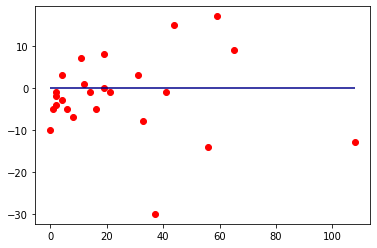

In [31]:
y = top_df['Total Medals Actual']

plt.scatter(total_medals_predictions,
            total_medals_predictions - y,
            c = 'red')

plt.hlines(y=0,
           xmin=total_medals_predictions.min(),
           xmax=total_medals_predictions.max(),
           colors ="darkblue")

plt.show()

### plot for actual medal count and (gold+silver+bronze) predictions
---

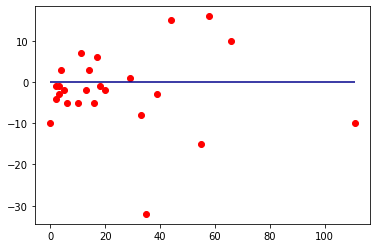

In [32]:
y = top_df['Total Medals Actual']

plt.scatter(top_df['Total Medals Predicted 2'],\
            top_df['Total Medals Predicted 2'] - y,
            c = 'red')

plt.hlines(y=0, xmin=top_df['Total Medals Predicted 2'].min(),\
           xmax=top_df['Total Medals Predicted 2'].max(),\
           colors ="darkblue")

plt.show()

In [34]:
from sklearn.metrics import mean_squared_error

MSE1 = mean_squared_error(top_df['Total Medals Actual'], top_df['Total Medals Predicted'])
MSE2 = mean_squared_error(top_df['Total Medals Actual'], top_df['Total Medals Predicted 2'])

gold_r2 = model1.score(X1_test, y1_test)
silver_r2 = model2.score(X2_test, y2_test)
bronze_r2 = model3.score(X3_test, y3_test)
total_r2 = model4.score(X4_test, y4_test)


print(f"MSE1: {MSE1}, MSE2: {MSE2}\nGold R2: {gold_r2},\nSilver R2: {silver_r2},\nBronze R2: {bronze_r2},\nTotal Medals R2: {total_r2}")

MSE1: 92.52, MSE2: 92.88
Gold R2: 0.7900207894229179,
Silver R2: 0.7707879242155011,
Bronze R2: 0.7205037649867392,
Total Medals R2: 0.8037830913145319
